# Dataset：“winemag-data_first150k.csv”

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist
from math import ceil
%matplotlib inline
data1 = pd.read_csv("./winemag-data_first150k.csv",encoding="utf-8")[["country", "points", "price", "province", "variety", "winery"]]
data2 = pd.read_csv("./winemag-data-130k-v2.csv",encoding="utf-8")[["country", "points", "price", "province", "taster_name", "variety", "winery"]]

print("winemag-data_first150k.csv标称属性有country，province，variety，winery")
print("winemag-data-130k-v2.csv标称属性有country，province，taster_name，variety，winery")

winemag-data_first150k.csv标称属性有country，province，variety，winery
winemag-data-130k-v2.csv标称属性有country，province，taster_name，variety，winery


## Summarize of number five： 

In [11]:
def fiveNumber(nums):
    #五数概括 Minimum（最小值）、Q1、Median（中位数、）、Q3、Maximum（最大值）
    Minimum=min(nums)
    Maximum=max(nums)
    Q1=np.percentile(nums,25)
    Median=np.median(nums)
    Q3=np.percentile(nums,75)
    
    IQR=Q3-Q1
    lower_limit=Q1-1.5*IQR #下限值
    upper_limit=Q3+1.5*IQR #上限值
    
    return Minimum,Q1,Median,Q3,Maximum

print("数值属性有points和price")
d = pd.DataFrame(data=data1[["price"]])#price属性有空值,转成DataFrame格式处理该空值
d=d.dropna(axis=0, how='any')
d=d.values
d=d.flatten()
m=fiveNumber(d)
points_five1=fiveNumber(data1[["points"][0]])
print("Wine/winemag-data_first150k.csv：\npoints缺省值数量："+str(data1[["points"]].isnull().sum()[0])+\
      "；五数概括："+str(points_five1)+"\nprice缺省值数量："+str(data1[["price"]].isnull().sum()[0])+"；五数概括："+str(m))

d2 = pd.DataFrame(data=data2[["price"]])
d2=d2.dropna(axis=0, how='any')
keep2=d2
d2=d2.values
d2=d2.flatten()
m2=fiveNumber(d2)
points_five2=fiveNumber(data2[["points"][0]])
print("Wine/winemag-data-130k-v2.csv：\npoints缺省值数量："+str(data2[["points"]].isnull().sum()[0])+\
      "；五数概括："+str(points_five2)+"\nprice缺省值数量："+str(data2[["price"]].isnull().sum()[0])+"；五数概括："+str(m2))


数值属性有points和price
Wine/winemag-data_first150k.csv：
points缺省值数量：0；五数概括：(80, 86.0, 88.0, 90.0, 100)
price缺省值数量：13695；五数概括：(4.0, 16.0, 24.0, 40.0, 2300.0)
Wine/winemag-data-130k-v2.csv：
points缺省值数量：0；五数概括：(80, 86.0, 88.0, 91.0, 100)
price缺省值数量：8996；五数概括：(4.0, 17.0, 25.0, 42.0, 3300.0)


## Box figure：

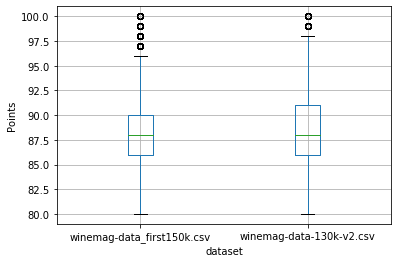

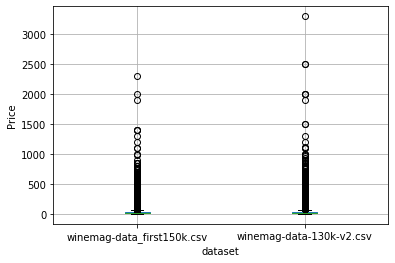

In [13]:
#point

point_box = pd.DataFrame({"winemag-data_first150k.csv":data1[["points"][0]],
                     "winemag-data-130k-v2.csv":data2[["points"][0]]})
point_box.boxplot()
plt.ylabel("Points")
plt.xlabel("dataset")
plt.show()

price_box = pd.DataFrame({"winemag-data_first150k.csv":data1[["price"][0]],
                     "winemag-data-130k-v2.csv":data2[["price"][0]]})
price_box.boxplot()
plt.ylabel("Price")
plt.xlabel("dataset")
plt.show()
point1_out=[]
point2_out=[]
#离群点函数
def outpoint(data,point3,point1):
    out=[]
    for i in range(len(data)):
        if (data[i]>(point3+1.5*(point3-point1))or\
           data[i]<(point1-1.5*(point3-point1))):
               out.append(data[i])
    return out

## Histogram：

Points' Histogram:


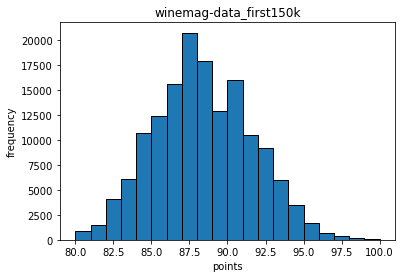

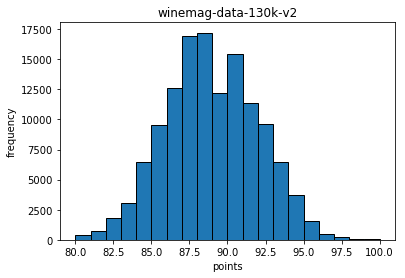

In [4]:
print("Points' Histogram:")#度数直方图
plt.show()
plt.hist(data1[["points"][0]], bins=20,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
plt.xlabel('points')
plt.ylabel('frequency')
plt.title('winemag-data_first150k')
plt.show()
plt.hist(data2[["points"][0]], bins=20,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
plt.xlabel('points')
plt.ylabel('frequency')
plt.title('winemag-data-130k-v2')
plt.show()

Points' Histogram:


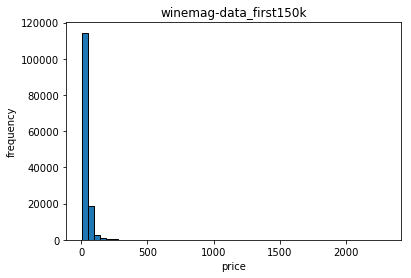

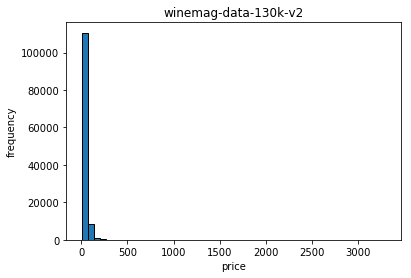

In [5]:
print("Points' Histogram:")#度数直方图

plt.hist(d, bins=50,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('winemag-data_first150k')
plt.show()
plt.hist(d2, bins=50,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('winemag-data-130k-v2')
plt.show()

## missing value：

In [12]:
print("缺失的数据为price数据：")
num_grapes = data1[ ["country","price", "variety"] ]
num_grapes=num_grapes[num_grapes['price'].isnull()]
num_country=num_grapes.groupby(by="country").count().sort_values(by="variety")[::-1]
num_variety=num_grapes.groupby(by="variety").count().sort_values(by="country")[::-1]
num_grapes2 = data2[ ["country","price", "variety"] ]
num_grapes2=num_grapes2[num_grapes2['price'].isnull()]
num_country2=num_grapes2.groupby(by="country").count().sort_values(by="variety")[::-1]
num_variety2=num_grapes2.groupby(by="variety").count().sort_values(by="country")[::-1]
print(num_country)
print(num_variety)

缺失的数据为price数据：
              price  variety
country                     
France            0     6313
Italy             0     4694
Portugal          0     1146
Austria           0      574
US                0      258
New Zealand       0      250
Spain             0      108
Germany           0      105
Australia         0       63
Chile             0       50
Argentina         0       44
South Africa      0       21
Israel            0       20
Slovenia          0       13
Greece            0       12
Uruguay           0        7
Croatia           0        6
Egypt             0        3
Canada            0        2
Tunisia           0        2
Turkey            0        2
England           0        1
Hungary           0        1
                                country  price
variety                                       
Bordeaux-style Red Blend           2802      0
Nebbiolo                            712      0
Chardonnay                          707      0
Red Blend                

## Directly culled missing values：

In [17]:
#绘图函数
def hist(d,bin,x,y,t):
    plt.hist(d, bins=bin,  edgecolor = 'black',\
         histtype='bar', align='mid', orientation='vertical')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(t)
    plt.show()
def box(data1,data2,y):
    box = pd.DataFrame({"winemag-data_first150k.csv":data1,
                         "winemag-data-130k-v2.csv":data2})
    box.boxplot()
    plt.ylabel(y)
    plt.xlabel("dataset")
    plt.show()   


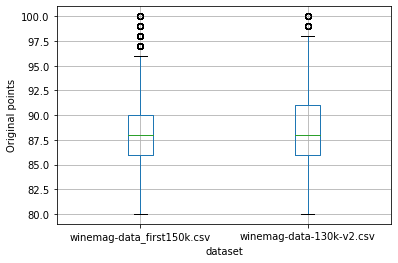

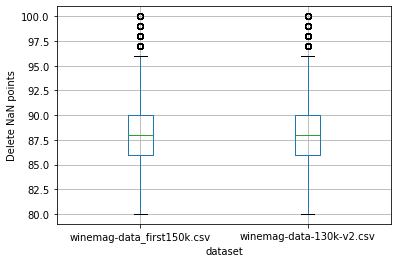

In [18]:
#剔除缺失值

data1_1=data1
data2_1=data2
data1_1=data1_1.dropna(axis=0, how='any')
data1_2=data1_1.dropna(axis=0, how='any')
box(data1[["points"][0]],data2[["points"][0]],'Original points')
box(data1_1[["points"][0]],data1_2[["points"][0]],'Delete NaN points')

## Fill high frequency value ：

winemag-data_first150k.csv:20.0


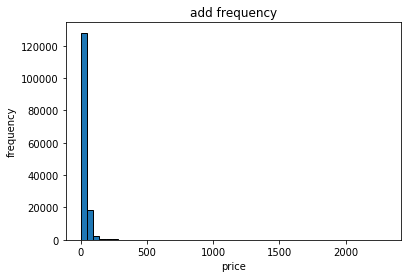

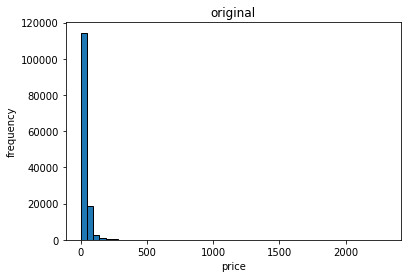

可以看其五数概括变化:

(4.0, 16.0, 22.0, 38.0, 2300.0)

其均值和Q3从原来24，40变成了22，38


winemag-data-130k-v2.csv:20.0


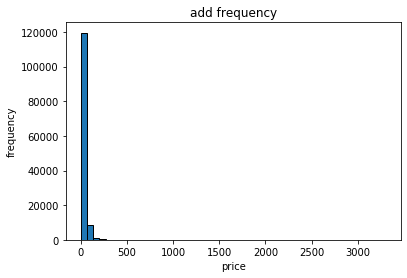

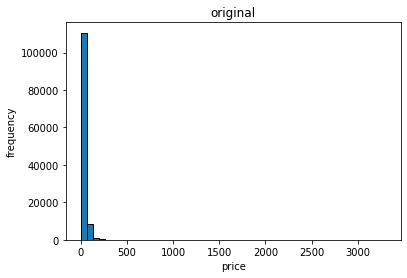

其五数概括变化:

(4.0, 18.0, 25.0, 40.0, 3300.0)

其Q1和Q3从原来17，42变成了18，40


In [20]:
#高频值填充
frequency1=data1[["price"][0]].mode()
frequency2=data2[["price"][0]].mode()
data2_1=data1[["price"][0]].fillna(frequency1[0])
data2_2=data2[["price"][0]].fillna(frequency2[0])
print("winemag-data_first150k.csv:"+str(frequency1[0]))
hist(data2_1,50,"price","frequency","add frequency")
hist(d,50,"price","frequency","original")
print("可以看其五数概括变化:\n")
print(fiveNumber(data2_1))
print("\n其均值和Q3从原来24，40变成了22，38")

print("\n\nwinemag-data-130k-v2.csv:"+str(frequency2[0]))
hist(data2_2,50,"price","frequency","add frequency")
hist(d2,50,"price","frequency","original")
print("其五数概括变化:\n")
print(fiveNumber(data2_2))
print("\n其Q1和Q3从原来17，42变成了18，40")

## Similarity padding between objects：

In [21]:
#对象之间的相似性填充
data3_1=data1
data3_2=data2
data3_3=data3_1[data3_1["country"]=="France"]
data3_4=data3_1[data3_1["country"]=="Italy"]
data3_3=data3_3.dropna(axis=0, how='any')
data3_4=data3_4.dropna(axis=0, how='any')

data3_5=data3_2[data3_2["country"]=="France"]
data3_6=data3_2[data3_2["country"]=="Italy"]
data3_5=data3_5.dropna(axis=0, how='any')
data3_6=data3_6.dropna(axis=0, how='any')
#print(data3_3)
frequency_France1=data3_3["price"].mode()
frequency_Italy1=data3_4["price"].mode()

frequency_France2=data3_5["price"].mode()
frequency_Italy2=data3_6["price"].mode()
print("winemag-data_first150k.csv: France mode:"+str(frequency_France1[0])+"  Italy mode:"+str(frequency_Italy1[0]))
print("winemag-data-130k-v2.csv: France mode:"+str(frequency_France2[0])+"  Italy mode:"+str(frequency_Italy2[0]))

winemag-data_first150k.csv: France mode:20.0  Italy mode:20.0
winemag-data-130k-v2.csv: France mode:20.0  Italy mode:20.0


## The correlation padding between the properties 

winemag-data_first150k.csv: PLCC=0.4598685797755384  Cosine similarity=[0.68591622]
winemag-data-130k-v2.csv: PLCC=0.40400175828729795  Cosine similarity=[0.64080925]


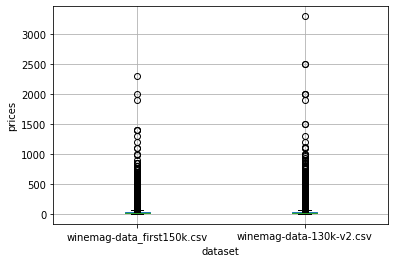

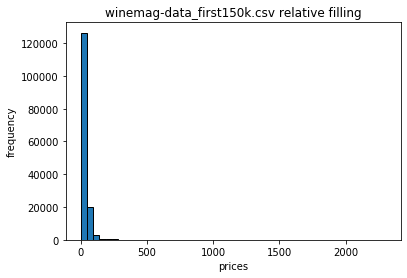

winemag-data_first150k.csv属性相关填充后五数概括(4.0, 16.0, 24.0, 40.0, 2300.0)


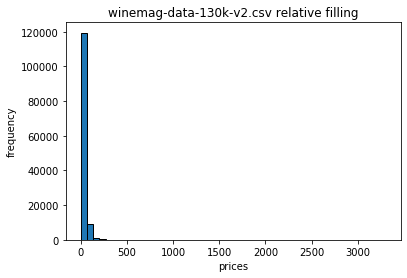

winemag-data-130k-v2.csv属性相关填充后五数概括(4.0, 17.0, 25.0, 41.0, 3300.0)


In [26]:
#属性间的相关性填充，由于数值只有point和price，以这两者考虑相似性
data4_1=data1
data4_2=data2
data4_1=data4_1.dropna(axis=0, how='any')
data4_2=data4_2.dropna(axis=0, how='any')
points1=data4_1["points"]
price1=data4_1["price"]
points2=data4_2["points"]
price2=data4_2["price"]
cos1 = np.vstack([points1,price1])
p1 = 1 - pdist(cos1,'cosine')
cos2 = np.vstack([points2,price2])
p2 = 1 - pdist(cos2,'cosine')
print("winemag-data_first150k.csv: PLCC="+str(points1.corr(price1,method="pearson"))+"  Cosine similarity="+str(p1))
print("winemag-data-130k-v2.csv: PLCC="+str(points2.corr(price2,method="pearson"))+"  Cosine similarity="+str(p2))

#以每个度数的中值来填充结果
xx = data1[[ "points", "price"]].groupby(by="points").median()
xx=xx.values
xx=xx.flatten()
yy = data1[[ "points", "price"]].groupby(by="points").median()
yy=yy.values
yy=yy.flatten()

data_add1=data1
data_add2=data2
dataadd_g1=pd.DataFrame()
dataadd_g2=pd.DataFrame()
for i in range(80,101):
    data_ad1=data_add1.loc[data_add1['points'].isin([i])].fillna(xx[i-80])
    data_ad2=data_add2.loc[data_add1['points'].isin([i])].fillna(yy[i-80])
    if(i==80):
        data_add_g1=data_ad1
        data_add_g2=data_ad2
    else:
        data_add_g1=pd.concat([data_add_g1,data_ad1],axis=0)
        data_add_g2=pd.concat([data_add_g2,data_ad2],axis=0)
prices1=data_add_g1[["price"][0]]
prices2=data_add_g2[["price"][0]]
box(prices1,prices2,"prices")
hist(prices1,50,"prices","frequency","winemag-data_first150k.csv relative filling")
print("winemag-data_first150k.csv属性相关填充后五数概括"+str(fiveNumber((prices1.values).flatten())))
hist(prices2,50,"prices","frequency","winemag-data-130k-v2.csv relative filling")
print("winemag-data-130k-v2.csv属性相关填充后五数概括"+str(fiveNumber((prices2.values).flatten())))